# smartllsm test

In [30]:
import torch
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
model = torch.hub.load('ultralytics/yolov5', 'custom', r'E:\Scott\smartLLSM\YOLO_weights.pt') 

def preprocess_image(img):

    percentile = 0.01
    percentile_threshold = 100 - percentile  # 100 - 0.3
    threshold_value = np.percentile(img, percentile_threshold)
    # we assume 2D here so if its 3D at this point the 3rd index we assume is channels that are identical as others for saving
    if len(img.shape) == 3:
        h, w, _ = img.shape
        timepoint_data = img[:,:, 0]
    elif len(img.shape) == 2:
        h, w = img.shape
        timepoint_data = img
    else:
        print("Shape Error in predict.preprocess_image")



#     print(img.shape)
#     print(threshold_value)


    timepoint_data_normalized = np.where(timepoint_data > threshold_value, threshold_value, timepoint_data)

    # Normalize the image to the range of 0 to 1

    timepoint_data_normalized2 = (timepoint_data_normalized - timepoint_data_normalized.min()) / (
        timepoint_data_normalized.max() - timepoint_data_normalized.min())
    # plt.imshow(timepoint_data_normalized2)

    img = (timepoint_data_normalized2 * 255).astype(np.uint8)

    return np.repeat(img[:, :, np.newaxis], 3, axis=2)
# Image
# img = '/path/to/test/image/25.jpg'
# # Inference
# results = model(img)
# # Results, change the flowing to: results.show()
# results.show()  # or .show(), .save(), .crop(), .pandas(), etc

# Load a model
# model = YOLO('E:\Scott\smartLLSM\YOLO_weights.pt')  # pretrained YOLOv8n model
imgdir = r'E:\Scott\Data\20240417\notlateenough\Scott_cropped\images\\'
# imgname = r"20240417_P1_t037_patch_1_0.png"
# imgname = r"20240417_P1_t037_patch_1_0.png"
# imgname = r"20240417_P1_t037_patch_1_0.png"
imgname = r"20240417_P5_t056_patch_1_0.png"
imgname = r"20240417_P5_t056_patch_0_2.png"
# Run batched inference on a list of images
# results = model(imgdir+imgname)  # return a list of Results objects

raw = io.imread(imgdir+imgname)
# raw.shape


raw = raw[np.newaxis,...]
#  creates a weird effect
raw_8bit = ((raw-raw.min(axis=(1,2))[:,None,None])/(raw.max(axis=(1,2))[:,None,None]-raw.min(axis=(1,2))[:,None,None])*(2**8-1)).astype('uint8')
newimg = np.repeat(raw_8bit[0,:, :, np.newaxis], 3, axis=2)
print(newimg.shape)
model.conf =0.01
results = model(newimg)  # return a list of Results objects




# raw = np.repeat(raw[:, :, np.newaxis], 3, axis=2)
# results = model(preprocess_image(raw))  # return a list of Results objects




# # Process results list
# for result in results:
#     boxes = result.boxes  # Boxes object for bounding box outputs
#     masks = result.masks  # Masks object for segmentation masks outputs
#     keypoints = result.keypoints  # Keypoints object for pose outputs
#     probs = result.probs  # Probs object for classification outputs
#     obb = result.obb  # Oriented boxes object for OBB outputs
#     result.show()  # display to screen
#     result.save(filename='E:\Scott\smartLLSM\predictions\\'+imgname)  # save to disk

Using cache found in C:\Users\u1604360/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-5-4 Python-3.9.19 torch-2.3.0 CUDA:0 (Quadro P5000, 16384MiB)

Fusing layers... 
Model summary: 224 layers, 7070092 parameters, 0 gradients
Adding AutoShape... 


(640, 640, 3)


In [31]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 640x640 4 interphases
Speed: 3.0ms pre-process, 13.0ms inference, 31.0ms NMS per image at shape (1, 3, 640, 640)

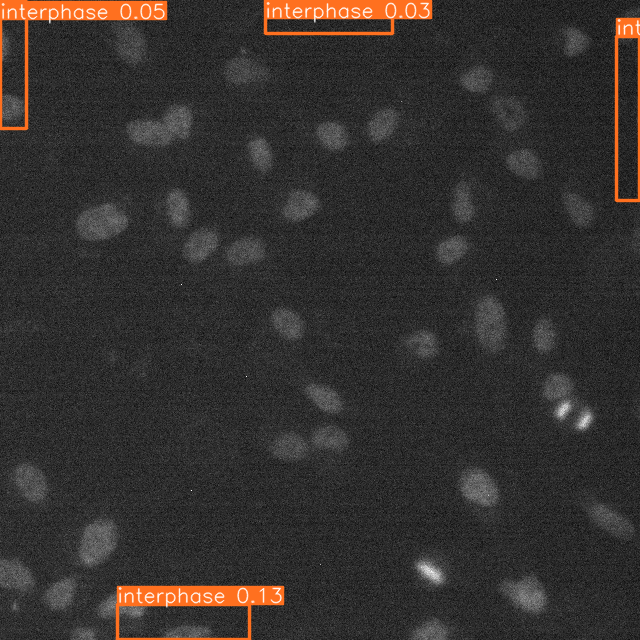

Saved 1 image to runs\detect\exp8


In [32]:
results.show()  # display to screen
results.save('E:\Scott\smartLLSM\predictions\\'+imgname)  # save to disk

Test my model on their data

In [7]:
%matplotlib inline
from ultralytics import YOLO
from glob import glob
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
image_reg = r'E:\Scott\smartLLSM\YOLO_demo\YOLO_demo\*.tif'
model_path = r'E:\Scott\GitHub\CelFDrive\Models\20240501_ScottlabelsV9\weights\best.pt'
model = YOLO(model_path)
image_files = glob(image_reg)

def preprocess_image(img):

    percentile = 0.01
    percentile_threshold = 100 - percentile  # 100 - 0.3
    threshold_value = np.percentile(img, percentile_threshold)
    # we assume 2D here so if its 3D at this point the 3rd index we assume is channels that are identical as others for saving
    if len(img.shape) == 3:
        h, w, _ = img.shape
        timepoint_data = img[:,:, 0]
    elif len(img.shape) == 2:
        h, w = img.shape
        timepoint_data = img
    else:
        print("Shape Error in predict.preprocess_image")



#     print(img.shape)
#     print(threshold_value)


    timepoint_data_normalized = np.where(timepoint_data > threshold_value, threshold_value, timepoint_data)

    # Normalize the image to the range of 0 to 1

    timepoint_data_normalized2 = (timepoint_data_normalized - timepoint_data_normalized.min()) / (
        timepoint_data_normalized.max() - timepoint_data_normalized.min())
    # plt.imshow(timepoint_data_normalized2)

    img = (timepoint_data_normalized2 * 255).astype(np.uint8)

    return np.repeat(img[:, :, np.newaxis], 3, axis=2)


for i, image_path in enumerate(image_files):
    # try:
    img = io.imread(image_path)
    print(f"Displaying {image_path} with shape {img.shape}")

    img = preprocess_image(img)

    results = model(img, conf =0.02)  # return a list of Results objects
    # # Process results list
    for result in results:
        boxes = result.boxes  # Boxes object for bounding box outputs
        print(boxes.shape[0])
        
        masks = result.masks  # Masks object for segmentation masks outputs
        keypoints = result.keypoints  # Keypoints object for pose outputs
        probs = result.probs  # Probs object for classification outputs
        obb = result.obb  # Oriented boxes object for OBB outputs
        if boxes.shape[0] > 0:
            result.save(filename=f'results{i}.jpg')



Displaying E:\Scott\smartLLSM\YOLO_demo\YOLO_demo\Scan_Iter_0000_0000.tif with shape (800, 800)

0: 640x640 (no detections), 150.9ms
Speed: 7.0ms preprocess, 150.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
0
Displaying E:\Scott\smartLLSM\YOLO_demo\YOLO_demo\Scan_Iter_0000_0001.tif with shape (800, 800)

0: 640x640 (no detections), 143.9ms
Speed: 6.0ms preprocess, 143.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
0
Displaying E:\Scott\smartLLSM\YOLO_demo\YOLO_demo\Scan_Iter_0000_0002.tif with shape (800, 800)

0: 640x640 (no detections), 139.9ms
Speed: 6.0ms preprocess, 139.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
0
Displaying E:\Scott\smartLLSM\YOLO_demo\YOLO_demo\Scan_Iter_0000_0003.tif with shape (800, 800)

0: 640x640 (no detections), 139.9ms
Speed: 6.0ms preprocess, 139.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
0
Displaying E:\Scott\smartLLSM\YOLO_demo\YOLO_demo\Scan_Iter_0000_000